In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

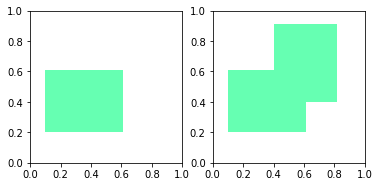

In [2]:
rect0 = Rectangle(0.1, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.8, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.098934 [    0/ 1000]
Test Error: 
 Accuracy: 95.0%, 94.0%
 Avg loss: 0.002880 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.092974 [    0/ 1000]
Test Error: 
 Accuracy: 96.0%, 96.0%
 Avg loss: 0.002905 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.094480 [    0/ 1000]
Test Error: 
 Accuracy: 96.0%, 95.0%
 Avg loss: 0.003059 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.103306 [    0/ 1000]
Test Error: 
 Accuracy: 96.0%, 95.0%
 Avg loss: 0.003193 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.106625 [    0/ 1000]
Test Error: 
 Accuracy: 96.0%, 94.0%
 Avg loss: 0.003243 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.110036 [    0/ 1000]
Test Erro

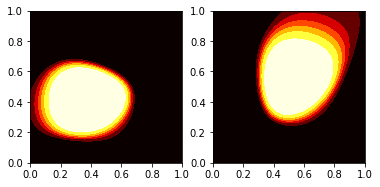

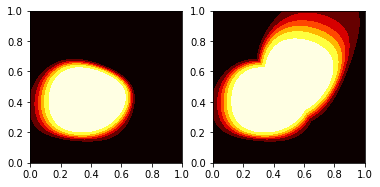

In [5]:
# model1 = torch.load('./models/rectangles-0.001751-1651865856.pth')
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(10, 'cpu', progressive=0)
# experiment.save(dir='./models/')

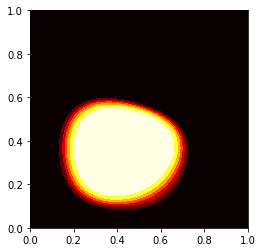

In [5]:
import numpy as np
x = np.linspace(0, 1, 1000)
y = x
z = torch.tensor([[[i, j] for j in y] for i in x]).reshape(-1, 2).float()
z = model1(z).detach().reshape(len(x), len(y), 2)
z0 = z[:, :, 0]
plt.contourf(x, y, z0, cmap='hot', alpha=1, vmin=0.1, vmax=1)
# plt.imshow(
#     z0, 
#     cmap='hot', 
#     interpolation='nearest', 
#     origin='lower', 
#     extent=(0., 1., 0., 1.),
#     vmin=0.,
#     vmax=1.
# )

from shapes import Rectangle
shape = Rectangle(0.2, 0.5, 0.4, 0.8)
shape.plot(plt)

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.162816 [    0/ 1000]
Test Error: 
 Accuracy: 99.0%, 94.0%
 Avg loss: 0.002692 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.161811 [    0/ 1000]
Test Error: 
 Accuracy: 98.0%, 93.0%
 Avg loss: 0.002915 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.165737 [    0/ 1000]
Test Error: 
 Accuracy: 99.0%, 94.0%
 Avg loss: 0.002857 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.165965 [    0/ 1000]
Test Error: 
 Accuracy: 99.0%, 94.0%
 Avg loss: 0.002828 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.164689 [    0/ 1000]
Test Error: 
 Accuracy: 99.0%, 94.0%
 Avg loss: 0.002882 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.165626 [    0/ 1000]
Test Erro

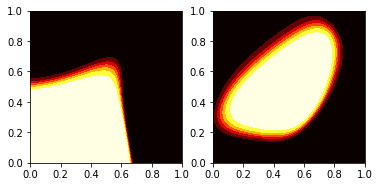

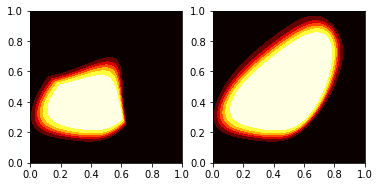

In [6]:
model2 = torch.load('models/rectangles-rev-0.00224-1651937783.pth')
experiment2 = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment2.run(10, 'cpu')
# experiment2.save(dir='./models/')

In [17]:
experiment2.save(dir='./models/')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.820020 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 66.0%
 Avg loss: 0.011108 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.612386 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 66.0%
 Avg loss: 0.010930 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.585223 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 66.0%
 Avg loss: 0.010910 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.584717 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 66.0%
 Avg loss: 0.010907 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.584387 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 66.0%
 Avg loss: 0.010879 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.580665 [    0/ 1000]
Test Erro

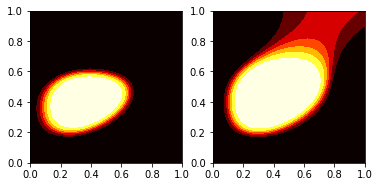

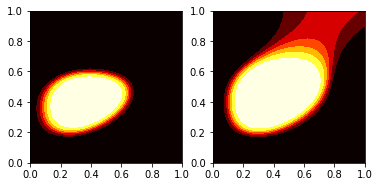

In [8]:
model3 = NeuralNetwork()
experiment3 = Experiment('rectangles-unconstrained', model3, shapes, [])
experiment3.run(1000, 'cpu')